<a href="https://colab.research.google.com/github/haseeb9700/hackathon_machinadoctarinas/blob/main/hackathon_machinadoctarinas_Colab_file_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("/content/Public Data.csv")

In [ ]:
df = df[df.columns.drop(['Unnamed: 0'])]
df

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,Afghanistan,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,Afghanistan,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,Afghanistan,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,Afghanistan,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,Afghanistan,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Zimbabwe,2012,Developing,44.11,721.0,29,4.37,-0.29,68.0,29,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,Zimbabwe,2011,Developing,44.42,720.0,27,3.58,-0.43,8.0,995,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,Zimbabwe,2010,Developing,45.22,75.0,25,3.89,-1.33,76.0,306,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,Zimbabwe,2009,Developing,45.72,686.0,24,1.33,0.16,68.0,528,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


In [ ]:
df['Country'] = df['Country'].astype('category')
# Assigning numerical values and storing in another column
df['Country'] = df['Country'].cat.codes
df

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,0,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,0,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,0,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,0,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,0,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,192,2012,Developing,44.11,721.0,29,4.37,-0.29,68.0,29,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,192,2011,Developing,44.42,720.0,27,3.58,-0.43,8.0,995,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,192,2010,Developing,45.22,75.0,25,3.89,-1.33,76.0,306,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,192,2009,Developing,45.72,686.0,24,1.33,0.16,68.0,528,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                2755 non-null   int64   
 1   Country                   2755 non-null   category
 2   Year                      2755 non-null   int64   
 3   Status                    2755 non-null   object  
 4   Power Level               2745 non-null   float64 
 5   Civilian Deaths           2745 non-null   float64 
 6   Military Accidents        2755 non-null   int64   
 7   Substance Abuse           2738 non-null   float64 
 8   Military Investment       2755 non-null   float64 
 9   Air Force                 2211 non-null   float64 
 10  Army                      2755 non-null   int64   
 11  Intelligence              2723 non-null   float64 
 12  Navy                      2755 non-null   int64   
 13  Submarines                2736 non-null   float6

In [ ]:
df["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:

df['Status'] = df['Status'].astype('category')
# Assigning numerical values and storing in another column
df['Status'] = df['Status'].cat.codes
df

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,0,2022,1,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,0,2021,1,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,0,2020,1,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,0,2019,1,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,0,2018,1,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,192,2012,1,44.11,721.0,29,4.37,-0.29,68.0,29,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,192,2011,1,44.42,720.0,27,3.58,-0.43,8.0,995,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,192,2010,1,45.22,75.0,25,3.89,-1.33,76.0,306,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,192,2009,1,45.72,686.0,24,1.33,0.16,68.0,528,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


In [ ]:
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Power Level                  10
Civilian Deaths              10
Military Accidents            0
Substance Abuse              17
Military Investment           0
Air Force                   544
Army                          0
Intelligence                 32
Navy                          0
Submarines                   19
Educational Investment       45
Literacy                     19
Revolts                       0
GDP                         419
Population                  611
Offense                      32
Defense                      32
Political Stability         157
International Reputation    153
dtype: int64

In [ ]:
df.dropna(subset = ['Power Level'], inplace=True)
df

,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,0,2022,1,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,0,2021,1,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,0,2020,1,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,0,2019,1,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,0,2018,1,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,192,2012,1,44.11,721.0,29,4.37,-0.29,68.0,29,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,192,2011,1,44.42,720.0,27,3.58,-0.43,8.0,995,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,192,2010,1,45.22,75.0,25,3.89,-1.33,76.0,306,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,192,2009,1,45.72,686.0,24,1.33,0.16,68.0,528,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


In [ ]:
df.head()

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation,Country_ID
0,1,Afghanistan,2022,0,59.73,271.0,62,-0.25,73.83,59.0,...,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57,0
1,2,Afghanistan,2021,0,60.50,268.0,66,-0.67,73.66,71.0,...,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40,0
2,3,Afghanistan,2020,0,60.09,271.0,70,-0.17,77.76,65.0,...,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52,0
3,4,Afghanistan,2019,0,58.88,279.0,70,0.69,6.95,72.0,...,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82,0
4,5,Afghanistan,2018,0,59.26,272.0,74,0.07,79.82,70.0,...,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14,0


# Analysis


In [ ]:
df_Afghanistan = df[df['Country']=='Afghanistan']
df_Afghanistan

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation,Country_ID
0,1,Afghanistan,2022,0,59.73,271.0,62,-0.25,73.83,59.0,...,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57,0
1,2,Afghanistan,2021,0,60.50,268.0,66,-0.67,73.66,71.0,...,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40,0
2,3,Afghanistan,2020,0,60.09,271.0,70,-0.17,77.76,65.0,...,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52,0
3,4,Afghanistan,2019,0,58.88,279.0,70,0.69,6.95,72.0,...,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82,0
4,5,Afghanistan,2018,0,59.26,272.0,74,0.07,79.82,70.0,...,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14,0
5,6,Afghanistan,2017,0,58.80,277.0,74,0.33,56.76,63.0,...,9.19,64.0,0.39,445.83,284326.0,18.19,18.44,-0.17,8.76,0
6,7,Afghanistan,2016,0,58.50,283.0,80,0.80,25.99,65.0,...,8.42,66.0,0.74,372.62,2729431.0,19.85,19.22,0.31,7.95,0
7,8,Afghanistan,2015,0,57.64,297.0,89,0.71,11.24,63.0,...,7.12,62.0,0.41,369.92,26616795.0,18.41,19.54,0.58,7.86,0
8,9,Afghanistan,2014,0,58.01,299.0,84,-1.30,16.92,60.0,...,6.93,60.0,0.35,273.08,2589343.0,20.09,19.70,0.30,8.44,0
9,10,Afghanistan,2013,0,57.62,287.0,86,-0.22,2.72,66.0,...,8.87,57.0,1.28,25.23,257795.0,18.46,18.70,0.07,7.81,0


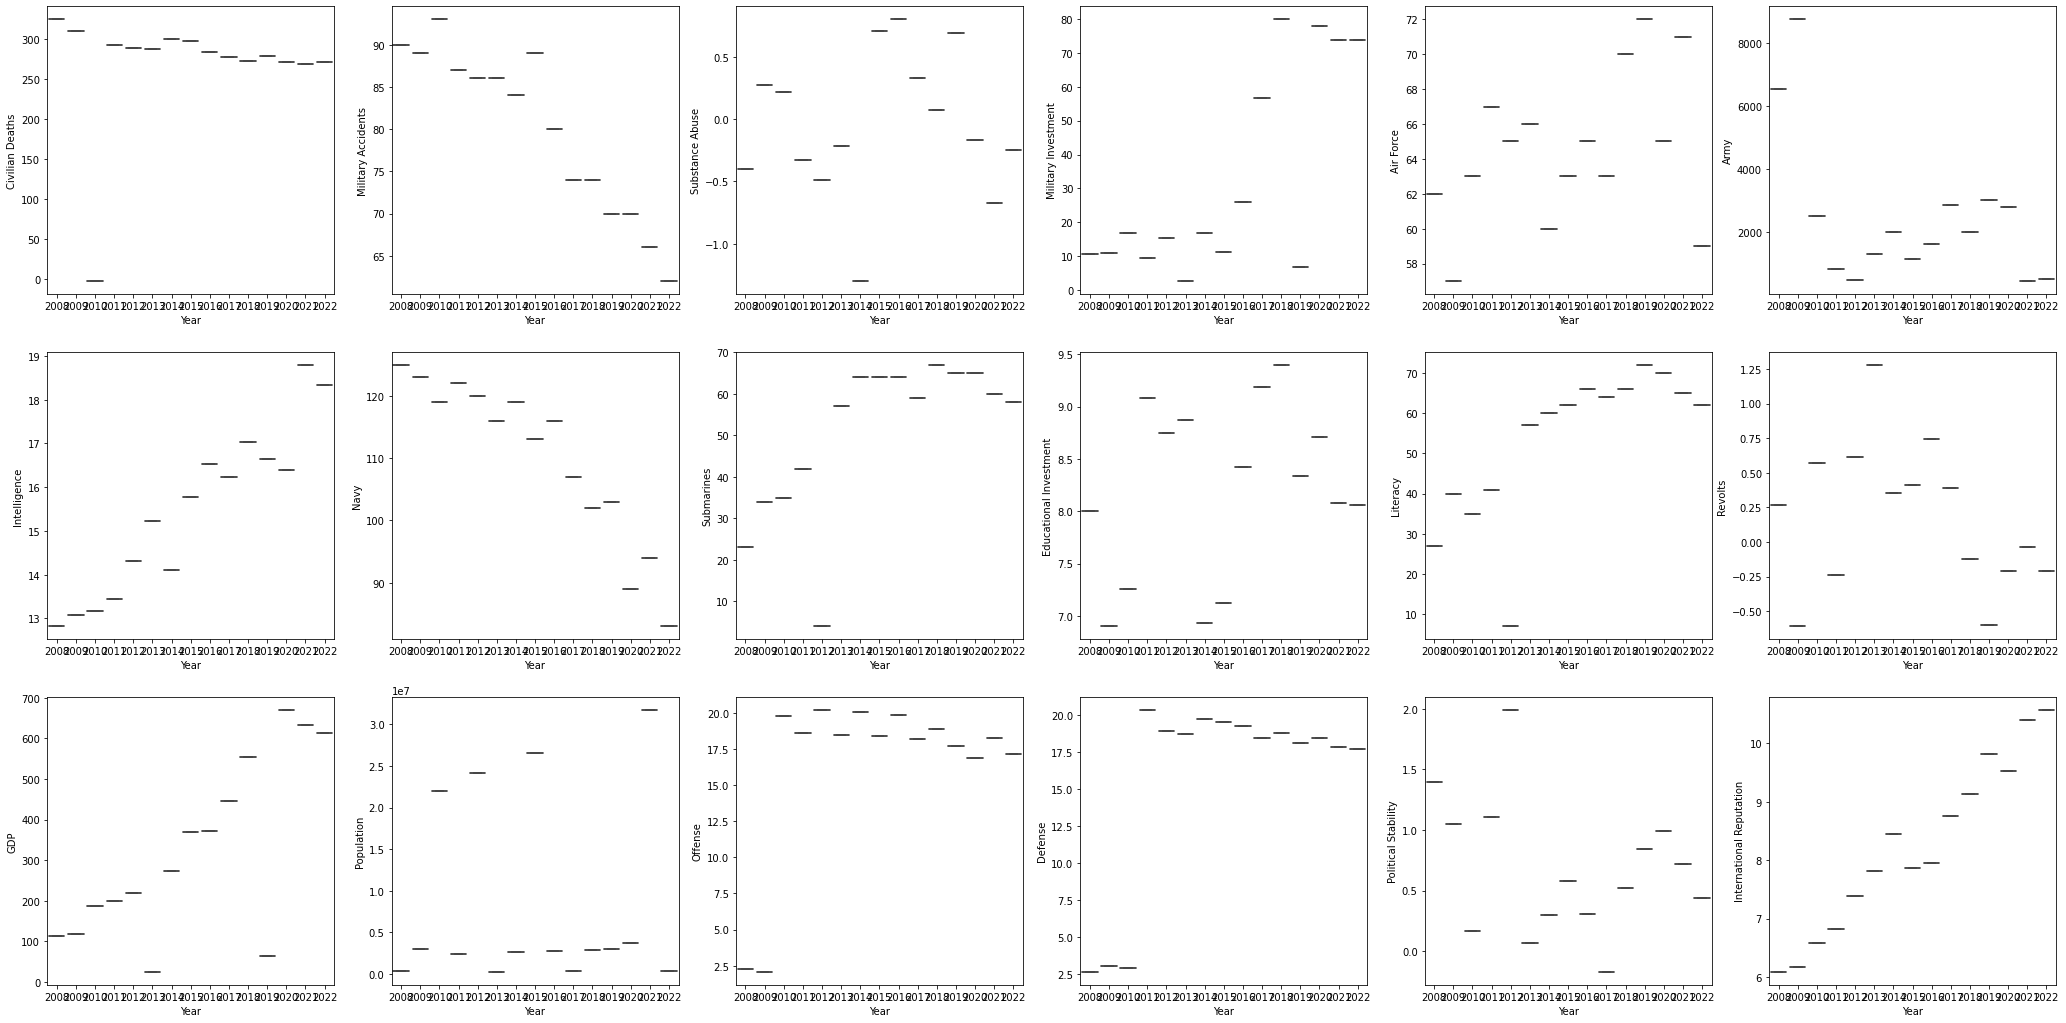

In [ ]:
import seaborn as sns

numerical  = ['Civilian Deaths', 'Military Accidents', 'Substance Abuse', 'Military Investment', 'Air Force', 'Army', 'Intelligence', 
              'Navy', 'Submarines', 'Educational Investment', 'Literacy', 'Revolts', 'GDP', 'Population', 'Offense', 'Defense', 'Political Stability', 
              'International Reputation']

fig, ax = plt.subplots(3, 6, figsize=(36, 18))
for var, subplot in zip(numerical, ax.flatten()):
  sns.boxplot(x='Year', y=var, data = df_Afghanistan, ax = subplot)

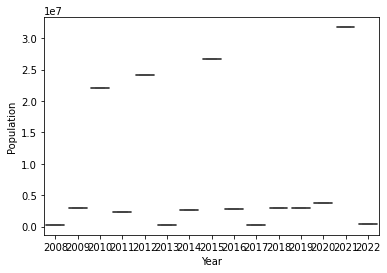

In [ ]:
sns.boxplot(x='Year', y='Population', data = df_Afghanistan)

# EDA

In [ ]:
import seaborn as sns

In [ ]:
numerical  = ['Civilian Deaths', 'Military Accidents', 'Substance Abuse', 'Military Investment', 'Air Force', 'Army', 'Intelligence', 
              'Navy', 'Submarines', 'Educational Investment', 'Literacy', 'Revolts', 'GDP', 'Population', 'Offense', 'Defense', 'Political Stability', 
              'International Reputation']
categorical = ['Year', 'Status']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


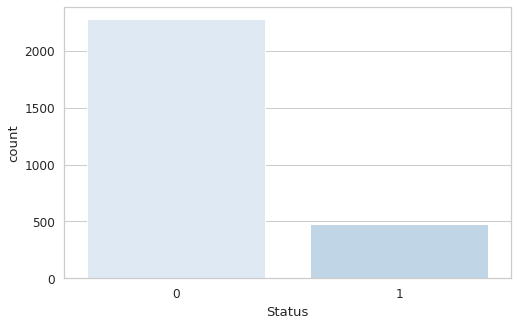

In [ ]:
sns.set(style='whitegrid', palette="Blues", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.countplot(df['Status'])

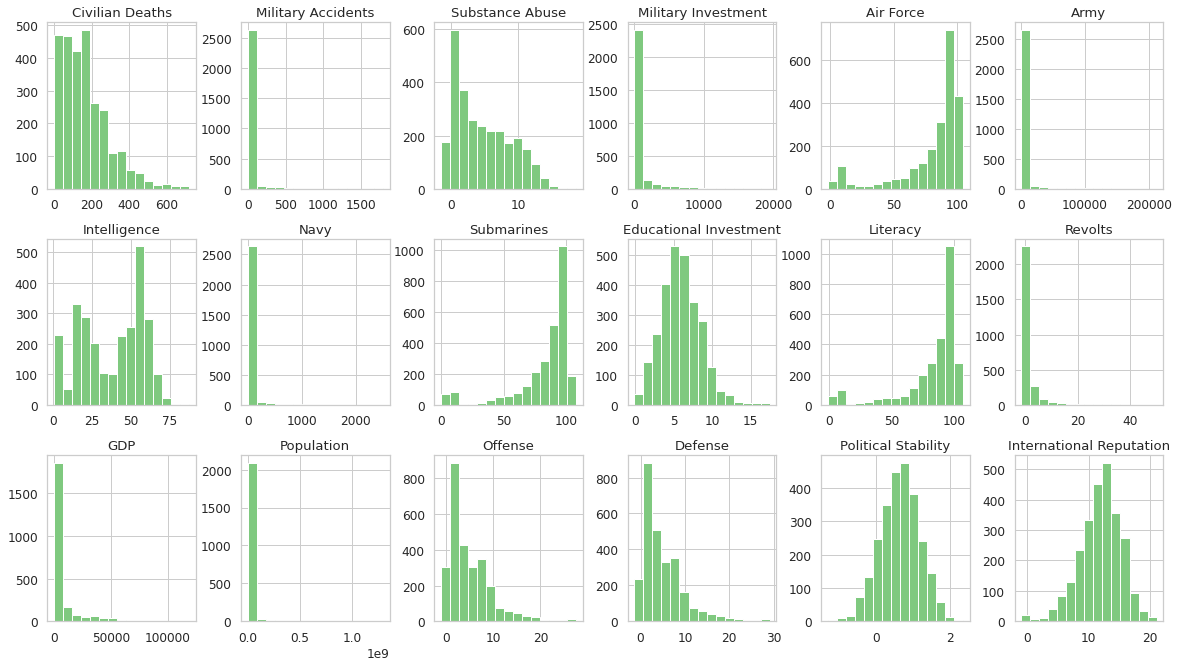

In [ ]:
sns.set(style='whitegrid', palette="Accent", font_scale=1.1, rc={"figure.figsize": [8, 5]})
df[numerical].hist(bins=15, figsize=(20, 15), layout=(4, 6));

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for column, subplot in zip(numerical, ax.flatten()):
  sns.scatterplot(x=df[column], y=df['Power Level']);

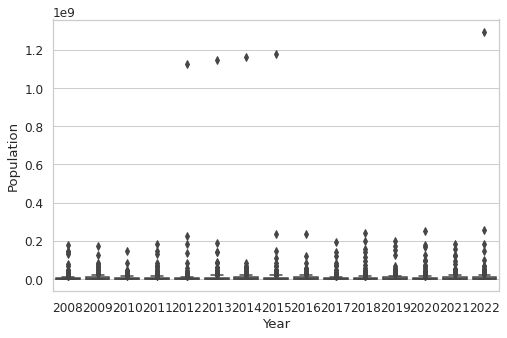

In [ ]:
sns.boxplot(x='Year', y='Population', data = df)

In [ ]:
df.groupby('Country')
df.value_counts('Year')

Year
2021    193
2008    183
2009    183
2010    183
2011    183
2012    183
2013    183
2014    183
2015    183
2016    183
2017    183
2018    183
2019    183
2020    183
2022    183
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,1,Afghanistan,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,2,Afghanistan,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,3,Afghanistan,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,4,Afghanistan,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,5,Afghanistan,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14


In [ ]:
df['Power Level'].dropna(inplace = True)

In [ ]:
df["Power Level"].isnull().sum()

0

In [ ]:
df[""]
df.drop('')

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,1,0,2022,0,59.73,271.0,62,-0.25,73.83,59.0,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,2,0,2021,0,60.50,268.0,66,-0.67,73.66,71.0,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,3,0,2020,0,60.09,271.0,70,-0.17,77.76,65.0,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,4,0,2019,0,58.88,279.0,70,0.69,6.95,72.0,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,5,0,2018,0,59.26,272.0,74,0.07,79.82,70.0,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,2933,192,2012,0,44.11,721.0,29,4.37,-0.29,68.0,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,2934,192,2011,0,44.42,720.0,27,3.58,-0.43,8.0,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,2935,192,2010,0,45.22,75.0,25,3.89,-1.33,76.0,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,2936,192,2009,0,45.72,686.0,24,1.33,0.16,68.0,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


In [ ]:
df_multiindex = df.set_index(['Country'])

KeyError: ignored

In [ ]:
df_new = df.groupby(df['Country'])
df_new

In [ ]:
df_multiindex

,Unnamed: 0,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,Army,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,2022,Developing,59.73,271.0,62,-0.25,73.83,59.0,495,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
Afghanistan,2,2021,Developing,60.50,268.0,66,-0.67,73.66,71.0,431,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
Afghanistan,3,2020,Developing,60.09,271.0,70,-0.17,77.76,65.0,2788,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
Afghanistan,4,2019,Developing,58.88,279.0,70,0.69,6.95,72.0,3014,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
Afghanistan,5,2018,Developing,59.26,272.0,74,0.07,79.82,70.0,1988,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2933,2012,Developing,44.11,721.0,29,4.37,-0.29,68.0,29,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
Zimbabwe,2934,2011,Developing,44.42,720.0,27,3.58,-0.43,8.0,995,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
Zimbabwe,2935,2010,Developing,45.22,75.0,25,3.89,-1.33,76.0,306,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
